<a href="https://colab.research.google.com/github/Sadiksha08/FDS-Lab-Work/blob/main/Project_Predicting_Purchasing_Intention_of_Online_Shoppers_Sadiksha_Singh_36_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT - PREDICTING ONLINE SHOPPERS PURCHASING INTENTION WITH PYTHON**

**Introduction :** 

In today’s world, people are so busy in their lives that they find it difficult to go out and shop for themselves. Also, adding to that online stores provide them so many options to choose from, while sitting at their homes, including discounts that a traditional store can never afford. More and more traffic to these sites is now coming from smartphones. People are now shopping on the go with their smartphones. As the number of online purchasers has increased tremendously, it also became the motivation for the present study. This study is a modest effort to analyze the main determinants of online purchase behaviours and explore the reasons that cause the shoppers to shop online or consider purchasing online rather than going out to the traditional stores. With e-commerce becoming more and more prevalent in today’s economy, businesses within this sector need to understand what factors influence a visitor to transform into a purchaser. Most online stores welcome countless visitors every day, but only a fraction of those visitors will make a purchase. Machine learning can predict whether online shoppers will buy something or browse around. In this project, I am going to develop a classification model that predicts purchase intentions. We assume a two-class prediction problem, where the goal is to predict the labels “buys” and “doesn’t buy” in the dataset they are labelled as “True” i.e. “buys” and “False” i.e. “doesn’t buy” for a group of visitors. . It is based on variables such as aggregated page view data which is kept track during visit of the customer along with session and user information. Prediction of customers who don’t purchase helps the e-commerce website to take actions to improve the website abandonment and purchase conversion rates.

**ABOUT THE DATASET**


**Dataset Link :** 

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided on the UC Irvine’s Machine Learning Repository. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website.


•	There are approximately 12,330 observations and 18 variables in the dataset.

•	The dataset consists of 10 numerical and 8 categorical attributes.

•	The 'Revenue' attribute can be used as the class label.






In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Below are the code of functions which i am going to use further in my analysis.**

In [ ]:
import numpy as np
import pandas as pd

# space count per coulmn
def colSpaceCount(colName):
    """
    returns: 
        number of rows which contain <blank>
    usage: 
        colSpaceCount(colName)
    """ 
    return (colName.str.strip().values == '').sum()


# space count for data frame
def SpaceCount(df): 
    """
    returns:  
        number of rows which contain <blank> iterating through each col of df
    usage: 
        SpaceCount(df)
    """
    colNames = df.columns
    dsRetValue = pd.Series() 
    for colName in colNames:
        if df[colName].dtype == "object": 
            dsRetValue[colName] = colSpaceCount(df[colName])
    return(dsRetValue)


# outlier count for column
def colOutCount(colValues):
    """
    returns: 
        count of outliers in the colName
    usage: 
        colOutCount(colValues)
    """
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(ndOutData)
    return ndOutData.size


# outlier count for dataframe
def OutlierCount(df): 
    """
    returns: 
        count of outliers in each column of dataframe
    usage: 
        OutlierCount(df): 
    """
    colNames = df.columns
    dsRetValue = pd.Series() 
    for colName in colNames:
        if (df[colName].dtypes == 'object'):
            continue
        #print(colName)
        colValues = df[colName].values
        #print(colValues)
        #outCount = colOutCount(colValues)
        #print(outCount)
        dsRetValue[colName] = colOutCount(colValues)
    return(dsRetValue)


# oulier index for column
def colOutIndex(colValues):
    """
    returns: 
        row index in the colName
    usage: 
        colOutIndex(colValues)
    """
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(ndOutData)
    return ndOutData


# oulier index for data frame
def OutlierIndex(df): 
    """
    returns: 
        row index of outliers in each column of dataframe
    usage: 
        OutlierIndex(df): 
    """
    colNames = df.columns
    dsRetValue = pd.Series() 
    for colName in colNames:
        if (df[colName].dtypes == 'object'):
            continue
        colValues = df[colName].values
        dsRetValue[colName] = str(colOutIndex(colValues))
    return(dsRetValue)


# outlier values for column 
def colOutValues(colValues):
    """
    returns: 
        actual outliers values in the colName
    usage: 
        colOutValues(colValues)
    """
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    ndOutData = np.where((colValues > upper_bound) | (colValues < lower_bound))
    ndOutData = np.array(colValues[ndOutData])
    return ndOutData


# outlier values for dataframe 
def OutlierValues(df): 
    """
    returns: 
        actual of outliers in each column of dataframe
    usage: 
        OutlierValues(df): 
    """
    colNames = df.columns
    dsRetValue = pd.Series() 
    for colName in colNames:
        if (df[colName].dtypes == 'object'):
            continue
        colValues = df[colName].values
        #print('Column: ', colName)
        #strRetValue = strRetValue + colName + " " + "\n"
        #strRetValue = strRetValue + str(colOutValues(colValues)) + " \n"
        #print(colOutValues(colValues))
        #print(" ")
        dsRetValue[colName] = str(colOutValues(colValues))
    return(dsRetValue)


# outlier limits
def OutlierLimits(colValues): 
    """
    returns: 
        upper boud & lower bound for array values or df[col] 
    usage: 
        OutlierLimits(df[col]): 
    """
    quartile_1, quartile_3 = np.percentile(colValues, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 3.0)
    upper_bound = quartile_3 + (iqr * 3.0)
    return lower_bound, upper_bound


# handle outlier by capping
# at lower limit & upper timit respectively
def HandleOutliers(colValues):
    """
    returns: 
        array values or df[col].values without any outliers
    usage: 
        HandleOutlier(df[col].values): 
    """
    lol, uol = OutlierLimits(colValues)
    colValues = np.where(colValues < lol, lol, colValues)
    colValues = np.where(colValues > uol, uol, colValues)
    return (colValues)


# standardize data
def StandardizeData(df, colClass):
    """
    desc:
        standardize data - all cols of df will be Standardized except colClass 
        x_scaled = (x — mean(x)) / stddev(x)
        all values will be between 1 & -1
    usage: 
        StandardizeData(df, colClass) 
    params:
        df datarame, colClass - col to ignore while transformation  
    """
    # preparing for standadrising
    colNames = df.columns.tolist()
    lstClass = df[colClass]
    # standardizaion : 
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # fit
    ar = scaler.fit_transform(df)
    # transform
    df = pd.DataFrame(data=ar)
    # # change as required
    df.columns = colNames
    df[colClass] = lstClass
    return(df)


# normalize data
def NormalizeData(df, colClass=""):
    """
    desc:
        normalize data - all cols of df will be Normalized except colClass 
        x_scaled = (x-min(x)) / (max(x)–min(x))
        all values will be between 0 & 1
    usage: 
        NormalizeeData(df, colClass) 
    params:
        df datarame, colClass - col to ignore while transformation  
    """
    # preparing for standadrising
    colNames = df.columns.tolist()
    if colClass != "":
        lstClass = df[colClass]
    from sklearn.preprocessing import MinMaxScaler
    # normalizing the data
    scaler = MinMaxScaler()
    # fit
    ar = scaler.fit_transform(df)
    # transform
    df = pd.DataFrame(data=ar)
    # # change as required
    df.columns = colNames
    if colClass != "":
        df[colClass] = lstClass
    return(df)


# Max Abs Scalaed Data
def MaxAbsScaledData(df, colClass):
    """
    desc:
        MaxAbsScaled data - all cols of df will be MaxAbsScaled except colClass 
        x_scaled = x / max(abs(x))
    Usage: 
        MaxAbsScaledData(df, colClass) 
    Params:
        df datarame, colClass - col to ignore while transformation  
    """
    # preparing for standadrising
    colNames = df.columns.tolist()
    lstClass = df[colClass]
    # normalizing the data 
    from sklearn.preprocessing import MaxAbsScaler
    scaler = MaxAbsScaler()
    # fit
    ar = scaler.fit_transform(df)
    # transform
    df = pd.DataFrame(data=ar)
    # # change as required
    df.columns = colNames
    df[colClass] = lstClass
    return(df)


# getFeatureScoresXTC - Extra Tree Classifier
def getFeatureScoresXTC(df, colClass):
    """
    desc:
        prints feature scores of all cols except colClass 
    usage: 
        getFeatureScoresXTC(df, colClass) 
    params:
        df datarame, colClass - col to ignore while transformation  
   """
    # make into array
    #print("\n*** Prepare Data ***")
    # store class variable  ... change as required
    clsVars = colClass
    allCols = df.columns.tolist()
    #print(allCols)
    allCols.remove(clsVars)
    #print(allCols)
    # split into X & y        
    X = df[allCols].values
    y = df[clsVars].values

    # feature extraction with ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    # extraction
    model = ExtraTreesClassifier(n_estimators=10, random_state=707)
    model.fit(X, y)
    #print("\n*** Column Scores ***")
    # summarize scores
    np.set_printoptions(precision=3)
    #print(model.feature_importances_)
    # data frame
    dfm =  pd.DataFrame({'Cols':allCols, 'Imp':model.feature_importances_})  
    dfm.sort_values(by='Imp', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last') 
    return (dfm)


# getFeatureScoresSKB - Select K Best
def getFeatureScoresSKB(df, colClass):
    """
    desc:
        prints feature scores of all cols except colClass 
    usage: 
        getFeatureScoresXTC(df, colClass) 
    params:
        df datarame, colClass - col to ignore while transformation  
    """
    # make into array
    #print("\n*** Prepare Data ***")
    # store class variable  ... change as required
    clsVars = colClass
    allCols = df.columns.tolist()
    #print(allCols)
    allCols.remove(clsVars)
    #print(allCols)
    # split into X & y        
    X = df[allCols].values
    y = df[clsVars].values
    
    # Feature extraction with selectBest
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    # feature extraction
    model = SelectKBest(score_func=f_classif, k=4)
    fit = model.fit(X, y)
    # summarize scores
    np.set_printoptions(precision=3)
    #print(fit.scores_)
    # data frame
    dfm =  pd.DataFrame({'Cols':allCols, 'Imp':fit.scores_})  
    dfm.sort_values(by='Imp', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last') 
    return (dfm)


# get OverSampleData
def getOverSamplerData(X,y): 
    """
    install:
        !pip install -U imbalanced-learn
    url:
        https://pypi.org/project/imbalanced-learn/
    desc:
        Random Over Sampler ... 
        creates duplicate records of the lower sample
        to match the sample size of highest size class
    usage: 
        getOverSamplerData(X, y) ... requires standard X, y 
    """
    # import
    from imblearn.over_sampling import RandomOverSampler
    # create os object
    os =  RandomOverSampler(random_state = 707)
    # generate over sampled X, y
    return (os.fit_resample(X, y))


# get SMOTE Sampler Data
def getSmoteSamplerData(X,y): 
    """
    install:
        !pip install -U imbalanced-learn
    url:
        https://pypi.org/project/imbalanced-learn/
    desc:
        SMOTE - Synthetic Minority Oversampling Technique 
        creates random new synthetic records
        to match the sample size of highest size class
    usage: 
        getSmoteSamplerData(X, y) ... requires standard X, y 
    """
    # import
    from imblearn.over_sampling import SMOTE
    # create smote object
    sm = SMOTE(random_state = 707)
    # generate over sampled X, y
    return (sm.fit_resample(X, y))


# get UnderSamplerData
def getUnderSamplerData(X,y): 
    """
    install:
        !pip install -U imbalanced-learn
    url:
        https://pypi.org/project/imbalanced-learn/
    desc:
        Random Under Sampler ... 
        deletes records of the higher sample
        to match the sample size of lowest size class
    usage:  
        getUnderSamplerData(X, y)
    params:
        requires standard X, y 
    """
    # import
    from imblearn.under_sampling import RandomUnderSampler
    # create os object
    us =  RandomUnderSampler(random_state = 707, replacement=True)
    # generate over sampled X, y
    return (us.fit_resample(X, y))


# one hot encoding
def oheBind(pdf, encCol):
    """
    desc:
        One Hot Encoding 
        Col With Categoric Values A & B is converted to ColA & ColB with 0s & 1s
    usage: 
        oheBind(pdf, encCol)
    params:
        pdf - data frame, encCol - column to be encoded
    returns:
        df with oheCols & encCol deleted
    """
    ohe = pd.get_dummies(pdf[[encCol]])
    #ohe.columns = pdf[encCol].unique()
    rdf = pd.concat([pdf, ohe], axis=1)
    rdf = rdf.drop(encCol, axis=1)
    return(rdf)

**Importing all required libraries**

In [ ]:
# here we are importing all the required libraries which are used for data analysis, data cleaning, data computation, data manipulation, and data presentation, etc.
# # first we are importing all the required libraries like numpy, Pandas, matplotlib, seaborn and math
# in Python with their respective alias np,pd,plt,sns 
# hides all warnings
import warnings
warnings.filterwarnings('ignore')

# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# sns
import seaborn as sns

**Read Data**

In [ ]:
# here we are now reading data from txt file and loading data in a dataframe using pd.read_csv function.
# it will read and store the content of an txt file into a dataframe object.
df = pd.read_csv(r'/content/gdrive/MyDrive/PROJECT - SEM - 2/online_shoppers_intention.csv',  delimiter = ",", header = 0)

#the type() function will returns the type of the dataframe
print(type(df))

<class 'pandas.core.frame.DataFrame'>


**Exploratory Data Analytics (EDA)**

In [ ]:
# Displaying up the top rows of the dataframe with their columns.
# The function head() will display the top rows of the dataframe, the default value of this function is 5, that is it will show top 5 rows when no argument is given to it.
# by default it will print top 5 rows of a dataframe
print(df.head())
# But if we want to see top 3 rows then we have to pass 3 as an arguement to head() function, then it will show top 3 rows of a dataframe
# print(df.head(3))    # it will print top 3 rows of a dataframe

# Similarly the function tail() will display the bottom or last rows of the dataframe, the default value of this function is 5, that is it will show bottom or last 5 rows when no argument is given to it.
print(df.tail())    # by default it will print bottom 5 rows of a dataframe

# But if we want to see bottom or last 2 rows then we have to pass 2 as an arguement to tail() function, then it will show bottom or last 2 rows of a dataframe
# print(df.tail(2)) # it will print last or bottom 2 rows of a dataframe

   Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False    False
3               0                      0.0  ...    False    False
4               0                      0.0  ...     True    False

[5 rows x 18 columns]
       Administrative  Administrative_Duration  ...  Weekend  Revenue
12325               3                    145.0  ...     True    False
12326               0                      0.0  ...     True    False
12327               0                      0.0  ...     True    False
12328               4                     75.0  ...    False    False
12329               0                      0.0  ...     True    False

[5 rows x 18 columns]


In [ ]:
# Here we are displaying the number of columns and names of the columns.
# The columns() function prints all the columns of the dataframe in a list form.
# it will provide list of all the columns of a dataframe
# dataframe.columns
print("\n*** Columns ***")
print(df.columns)


*** Columns ***
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [ ]:
# shape
# Displaying the shape of the dataframe.
# The shape of the dataframe means to print the total number of rows or entries and the total number of columns or features of that particular dataframe.

# dataframe.shape fuction gives the shape of the dataframe
# it will give total number of rows and columns.
# In the output the first one is the number of rows and  
# the other one is the number of columns.
# Here In our dataframe there are total 12330 rows and 18 columns
print("\n*** shape ***")
print(df.shape)


*** shape ***
(12330, 18)


In [ ]:
# Structure of dataframe

# info
print("\n*** Structure ***")
print(df.info())
# Use of info() function : dataframe.info() function is used to get a short summary or datastructure of the dataframe and return None.
# it is most important for exploratory analysis of the data (EDA).
# we get a quick overview of the datasets using dataframe.info() function.
# As we can see in the output, the summary includes list of all columns with their data types
# and the number of non-null values in each column
# and it will also show or give the value of rangeindex provided for the index axis and memory usage.


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tra

In [ ]:
# Another method for getting datatypes pf each columns
# We use Dataframe.dtypes to get Data types of columns in Dataframe.
# It returns a series object containing data type information of each column.
# And dataframe.info() will also provide the structure of the dataframe along with the datatypes of each column.
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
# summary
#print(df.describe(include='all'))
# Pandas describe() function is used to view some basic statistical details or summary like percentile, mean, count, max, min, std etc. of a data frame or a series of numeric values or Columns
# And, function excludes the character columns and give summary about numeric columns.
# 'include' is the argument which is used to pass necessary information regarding what columns need to be considered for summarizing.
# df.describe(include='all') Summarizes all columns together means it will give statistical summary of both numeric as well as charater or string columns
# by default it will give summary of numeric columns only.
# in summary it will provide count, mean, standard deviation, minimum value, maximum value and quartiles of each columns
print("\n*** Summary ***")
df.describe(include="all")


*** Summary ***


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


**Class Variable & Counts**

In [ ]:
##############################################################
# Class Variable & Counts
##############################################################

# store class variable  
# change as required
clsVars = "Revenue"
print("\n*** Class Variable ***")
print(clsVars)

# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

# get unique Class names
print("\n*** Unique Class - Categoric Numeric ***")
lnLabels = df[clsVars].unique()
print(lnLabels)


*** Class Variable ***
Revenue

*** Counts ***
Revenue
False    10422
True      1908
dtype: int64

*** Unique Class - Categoric Numeric ***
[False  True]


**Visual data analytics (VDA)**

**Data Visualization :**  Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

**1 - Pie charts which show the quantity ratios of several categorical columns**

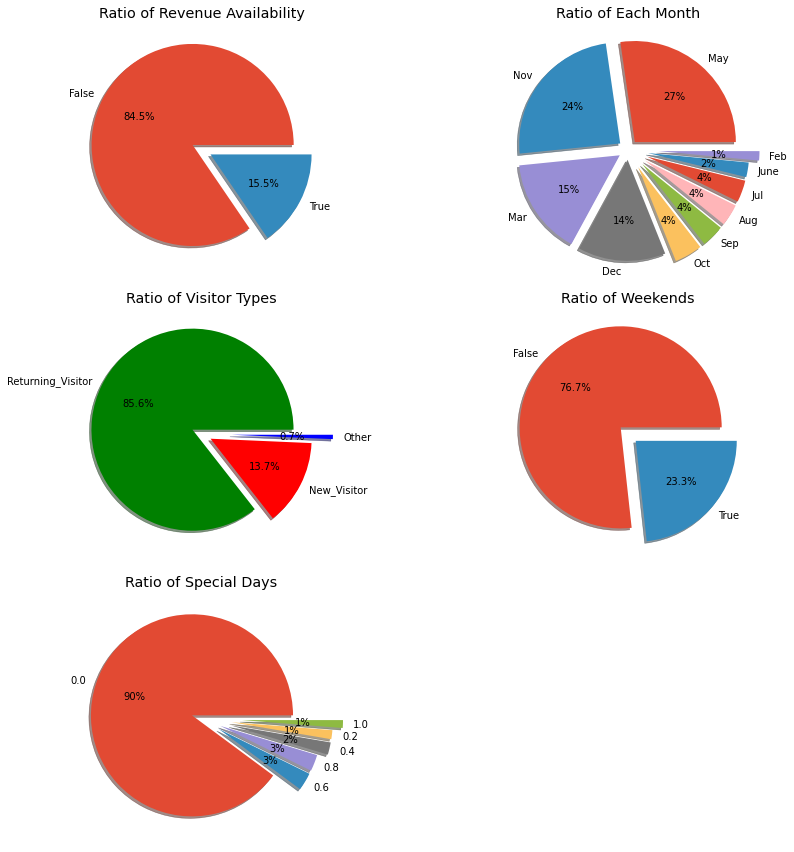

In [ ]:
# 1) Pie charts which show the quantity ratios of several categorical columns

# Lets see other categorical features with pie chart
plt.style.use('ggplot')
fig,ax = plt.subplots(3,2,figsize=(10,6))
fig.set_figheight(12)
fig.set_figwidth(12)
plt.tight_layout()
# Revenue
ax[0,0].pie(df['Revenue'].value_counts().values,labels = ['False','True'],explode = [0.1,0.1],shadow = True,autopct='%1.1f%%')
ax[0,0].set_title('Ratio of Revenue Availability')


# Month() No Jan and April
ax[0,1].pie(df['Month'].value_counts().values,labels= df['Month'].value_counts().index[:],shadow = True, explode = [0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.3],autopct='%1.0f%%')
ax[0,1].set_title('Ratio of Each Month')

# Visitor Types
ax[1,0].pie(df['VisitorType'].value_counts().values,labels= df['VisitorType'].value_counts().index[:],explode = [0.1,0.1,0.3],shadow = True,autopct='%1.1f%%',colors=['green','red','blue'])
ax[1,0].set_title('Ratio of Visitor Types')

# Weekend
ax[1,1].pie(df['Weekend'].value_counts().values,labels= df['Weekend'].value_counts().index[:],explode = [0.1,0.1],shadow = True,autopct='%1.1f%%')
ax[1,1].set_title('Ratio of Weekends')

# Special Days
ax[2,0].pie(df['SpecialDay'].value_counts().values,labels= df['SpecialDay'].value_counts().index[:],explode = [0.1,0.2,0.2,0.3,0.3,0.4],shadow = True,autopct='%1.0f%%')
ax[2,0].set_title('Ratio of Special Days')

fig.delaxes(ax[2,1])


•	**Useful insight:**

•	**Ratio of Revenue:** 
From the above graph we can see that Our class labels i.e. Revenue column are somewhat imbalanced, as there are much more cases in the data with a prediction “False” i.e. 84.5% and only 15.5% data with a prediction “True”. The reason is that more visitors won’t buy anything. Imbalanced data can affect the performance of classification models. But now that we are aware of the imbalance in our data, we can later choose appropriate evaluation metrics. 

•	**-> Other highlights include:**

**•	Ratio of Each month —** Month of the site visit. From the graph we can see that we don’t have month January and April as there are no data of these months means there are no visitors who have visited the site in month of Jan and Apr.
There are 27% visitors who have visited the site in the May month, 24% have visited the site in  the   	month of November, 15% visitors have visited the site in  the month of March, then 14% have 	visited the site in  the month of December, 4% visitors have visited the site in  the month of July, 	August, September and October respectively, and 1% visitors have visited the site in  the month of 	February and 2% visitors have visited the site in  the month of June.

**•	Ratio of Visitor Types —** Out of all the types of visitors, 85.5% visitors are Returning_Visitor, 13.8% visitors are New_Visitors who has visited that e-commerce website. And 0.7% visitors are the others types of visitors.

**•	Ratio Of Weekends —** There are 76.7% of shoppers who have not visited the website on weekend i.e. they might be visited on weekdays rather than weekend and there are 23.3% of shoppers who have visited  the website on weekends.

**•	Ratio of Special Days —** closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.


**2 - Correlation with Revenue**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

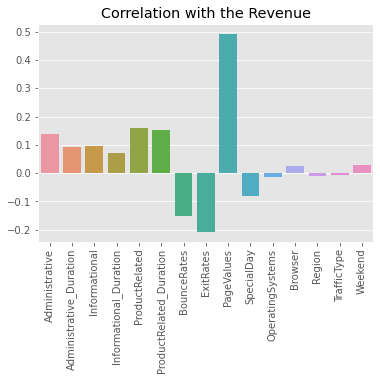

In [ ]:
# 2) Correlation with Revenue
df_corr = df.corr()['Revenue'] 
sns.barplot(df_corr[0:-1].index,df_corr[0:-1].values).set_title('Correlation with the Revenue')
plt.xticks(rotation = 90)

**•	Useful Insight:**

From the above graph we can see that which variables or feature is most likely to be correlated with the class variable i.e. ‘Revenue’ feature. Page Values has the highest correlation (around 0.5) with Revenue compare to all other features. Means By looking at the two graphs above, as the PageValues increase, the BounceRates/ExitRates decrease. As the PageValues increase, the customers are more likely to make a transactions i.e. Revenue, which leads to lower Bounce/Exit Rates.


**3 - Correlation Between the Features**

(17.0, -1.0)

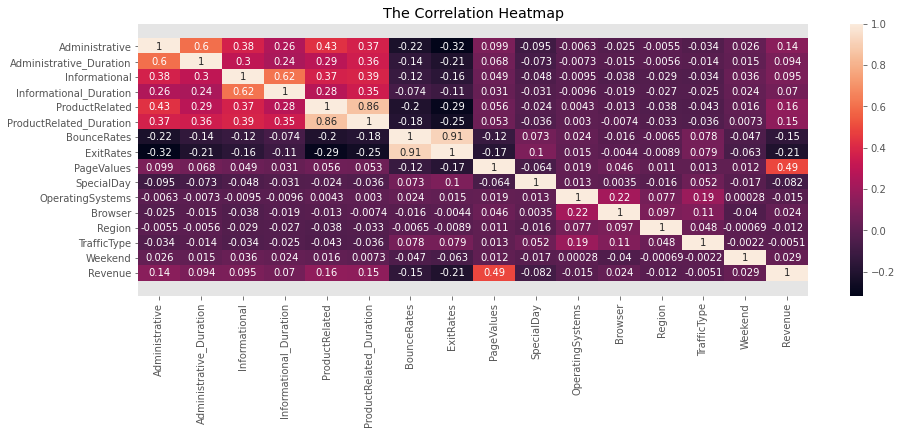

In [ ]:
# 3) Correlation Between the Features
plt.figure(figsize=(15,5))
ax = sns.heatmap(df.corr(),annot=True)
ax.set_title('The Correlation Heatmap')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+1,top-1)

**•	Useful Insight:**

From this graph also we can see that BounceRates and ExitRates are very highly correlated with each other i.e. 91% correlation between them. And also ProductRelated and ProductRelated_Duration are also highly correlated with each other i.e. 86% correlation between them.


**4 - Bar charts which show the ratio between False Revenue and True Revenue of some numerical and categorical columns.**

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


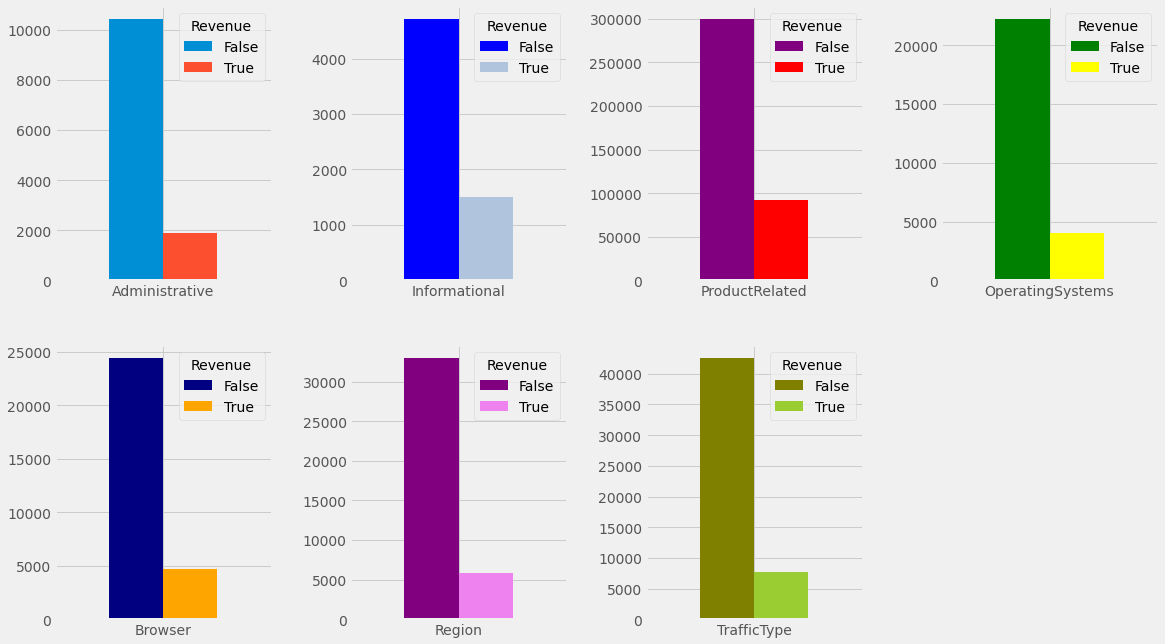

In [ ]:
# 4) Bar charts which show the ratio between False Revenue and True Revenue of some numerical and categorical columns.

# Lets see the Ratio of Revenue in each types
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 2, ncols = 4,figsize = (17,10))
fig.tight_layout(pad = 3)


adm_rev = df[['Administrative','Revenue']]
rev_p1 = pd.DataFrame(df.groupby('Revenue')['Administrative'].count()).T
rev_p1.plot.bar(stacked=False,ax=ax[0,0])
ax[0,0].set_xticklabels(['Administrative'], rotation=360)
plt.legend(loc='best')


info_rev = df[['Informational','Revenue']]
rev_p2 = pd.DataFrame(df.groupby('Revenue')['Informational'].sum()).T
rev_p2.plot.bar(stacked=False,ax = ax[0,1],color = ['blue','lightsteelblue'])
ax[0,1].set_xticklabels(['Informational'], rotation=360)
plt.legend(loc='best')

info_rev = df[['ProductRelated','Revenue']]
rev_p2 = pd.DataFrame(df.groupby('Revenue')['ProductRelated'].sum()).T
rev_p2.plot.bar(stacked=False,ax = ax[0,2],color = ['purple','red'])
ax[0,2].set_xticklabels(['ProductRelated'], rotation=360)
plt.legend(loc='best')



info_rev = df[['OperatingSystems','Revenue']]
rev_p2 = pd.DataFrame(df.groupby('Revenue')['OperatingSystems'].sum()).T
rev_p2.plot.bar(stacked=False,ax = ax[0,3],color = ['green','yellow'])
ax[0,3].set_xticklabels(['OperatingSystems'], rotation=360)


info_rev = df[['Browser','Revenue']]
rev_p2 = pd.DataFrame(df.groupby('Revenue')['Browser'].sum()).T
rev_p2.plot.bar(stacked=False,ax = ax[1,0],color = ['navy','orange'])
ax[1,0].set_xticklabels(['Browser'], rotation=360)


info_rev = df[['Region','Revenue']]
rev_p2 = pd.DataFrame(df.groupby('Revenue')['Region'].sum()).T
rev_p2.plot.bar(stacked=False,ax = ax[1,1],color = ['purple','violet'])
ax[1,1].set_xticklabels(['Region'], rotation=360)


info_rev = df[['TrafficType','Revenue']]
rev_p2 = pd.DataFrame(df.groupby('Revenue')['TrafficType'].sum()).T
rev_p2.plot.bar(stacked=False,ax = ax[1,2],color = ['olive','yellowgreen'])
ax[1,2].set_xticklabels(['TrafficType'], rotation=360)

fig.delaxes(ax[1,3])

**5 - Ratio of Revenue in each categorical features**

Text(0.5, 1.0, 'Ratio of Revenue Of Each Special Days')

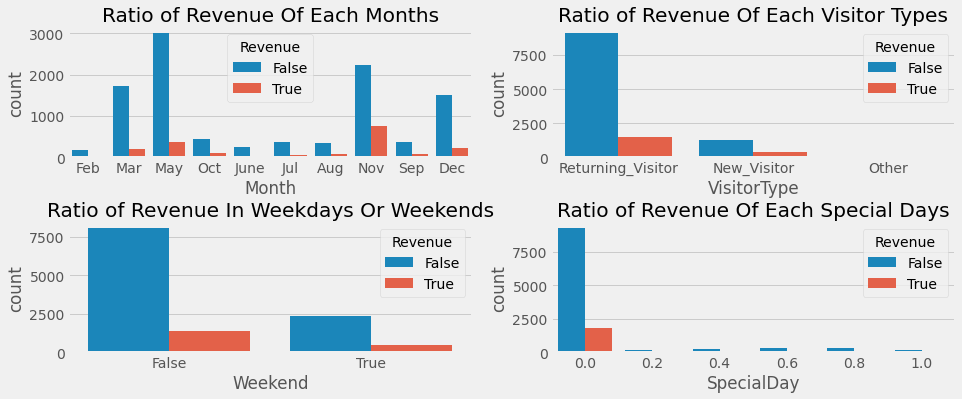

In [ ]:
# 5) Lets see the Ratio of Revenue in each categorical features
fig, ax = plt.subplots(2,2,figsize = (14,6))
plt.tight_layout(pad= 3)

month_rev = df[['Month','Revenue']]
vis_rev = df[['VisitorType','Revenue']]
weekends_rev = df[['Weekend','Revenue']]
spd_rev = df[['SpecialDay','Revenue']]

sns.countplot(x = month_rev['Month'],hue = month_rev['Revenue'],ax =ax[0,0]).set_title('Ratio of Revenue Of Each Months')
sns.countplot(x = vis_rev['VisitorType'],hue = vis_rev['Revenue'],ax =ax[0,1]).set_title('Ratio of Revenue Of Each Visitor Types')
sns.countplot(x = weekends_rev['Weekend'],hue = weekends_rev['Revenue'],ax =ax[1,0]).set_title('Ratio of Revenue In Weekdays Or Weekends')
sns.countplot(x = spd_rev['SpecialDay'],hue = spd_rev['Revenue'],ax =ax[1,1]).set_title('Ratio of Revenue Of Each Special Days')

**Above are some (Non-Stacked) bar charts to describe or show the ratio between False Revenue and True Revenue of some categorical columns.**

**6 - Distributiion of all columns using boxplot**


*** Box Plot ***


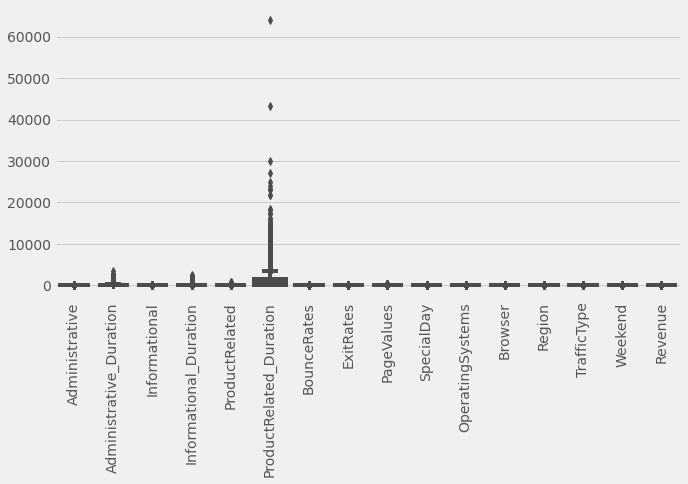

In [ ]:
# boxplot
print("\n*** Box Plot ***")
plt.figure(figsize=(10,5))  # 10,5
sns.boxplot(data=df, color='b')
plt.xticks(rotation = 90)
plt.show()

**7 - Data Related to the Bounce Rate, Exit Rate and Page Values**

Text(0.5, 1.0, 'Distribution of BounceRates Depending on Availability of Making Revenue')

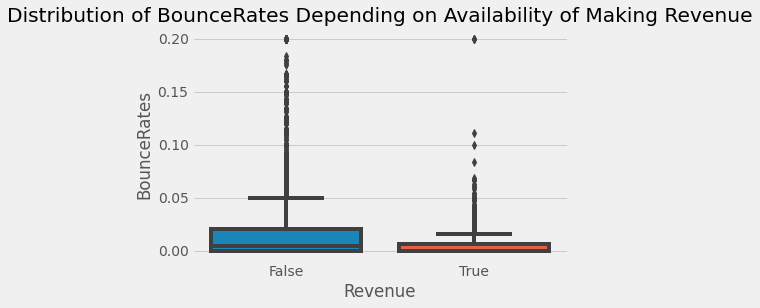

In [ ]:
# 7) LETS SEE SOME DATA RELATED TO THE BOUNCE, EXIT RATE AND PAGE VALUES

sns.boxplot(x=df['Revenue'],y=df['BounceRates']).set_title('Distribution of BounceRates Depending on Availability of Making Revenue')

Text(0.5, 1.0, 'Distribution of ExitRates Depending on Availability of Making Revenue')

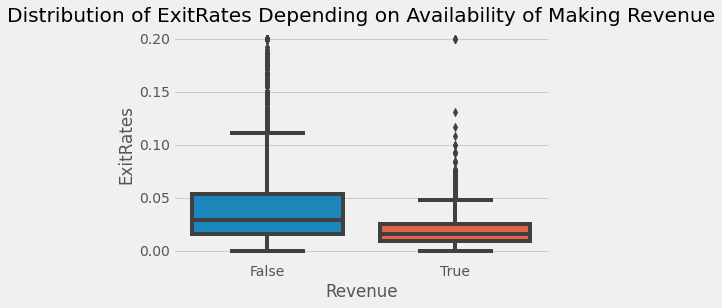

In [ ]:
# Distribution of ExitRates Depending on Availability of Making Revenue

sns.boxplot(x=df['Revenue'],y=df['ExitRates']).set_title('Distribution of ExitRates Depending on Availability of Making Revenue')

Text(0.5, 1.0, 'Page Values depending on Availability of Making Revenue')

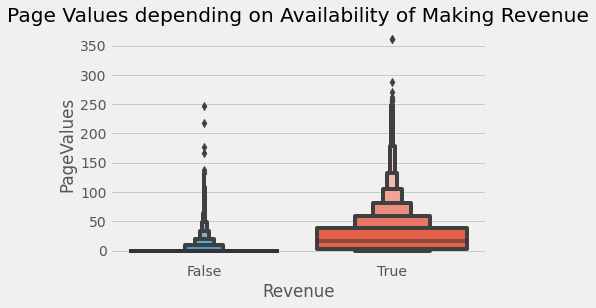

In [ ]:
# Page Values depending on Availability of Making Revenue

sns.boxenplot(x=df['Revenue'],y=df['PageValues']).set_title('Page Values depending on Availability of Making Revenue')

**•	Useful Insight:**

From the above three graphs we observe that, Customers who actually made the transactions are less likely to Exit or Bounce from the website and the pagevalues is usually higher than the Customers who did not make the purchase.


**8 - Analysis of Administrative,Informational and ProductRelated Duration**

Text(0.5, 1.0, 'Each Types of Durations Distribution')

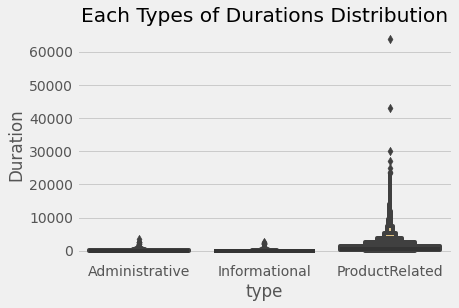

In [ ]:
# 8) # Durations

admin_df = pd.DataFrame(df['Administrative_Duration'])
admin_df.rename(columns={'Administrative_Duration' :'Duration'},inplace = True)
admin_df['type'] = admin_df['Duration'].apply(lambda x:'Administrative')

inform_df= pd.DataFrame(df['Informational_Duration'])
inform_df.rename(columns={'Informational_Duration' :'Duration'},inplace =True)
inform_df['type'] = inform_df['Duration'].apply(lambda x:'Informational')

prod_df= pd.DataFrame(df['ProductRelated_Duration'])
prod_df.rename(columns={'ProductRelated_Duration' :'Duration'},inplace =True)
prod_df['type'] = prod_df['Duration'].apply(lambda x:'ProductRelated')

dur_df = pd.concat([admin_df,inform_df,prod_df])
sns.boxenplot(dur_df['type'], dur_df['Duration']).set_title('Each Types of Durations Distribution')


**•	Useful Insights**

The distribution of Administrative and Informational are very narrowly distributed compared to ProductRelated Column.


**9 - ProductRelated Durations**

In [ ]:
# 9) Longer the ProductRelated Durations, more likely to make revenue?

prddur_rev = df.groupby('Revenue')['ProductRelated_Duration'].mean()
prddur_rev = pd.DataFrame(prddur_rev)
prddur_rev

,ProductRelated_Duration
Revenue,
False,1069.987809
True,1876.209615


**Useful Insight:**

As the result, the average duration of ProductRelated with true Revenue is higher than with the false Revenue.

**DATA TRANSFORMATION**
---





**Class Variable & Counts**

In [ ]:
# store class variable  
# change as required
clsVars = "Revenue"
print("\n*** Class Variable ***")
print(clsVars)

# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

# get unique Class names
print("\n*** Unique Class - Categoric Numeric ***")
lnLabels = df[clsVars].unique()
print(lnLabels)


*** Class Variable ***
Revenue

*** Counts ***
Revenue
False    10422
True      1908
dtype: int64

*** Unique Class - Categoric Numeric ***
[False  True]


In [ ]:
# convert string / categoric to numeric
print("\n*** Unique Species - Categoric Alpha to Numeric ***")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df[clsVars] = le.fit_transform(df[clsVars])
lnCCodes = df[clsVars].unique()
print(lnCCodes)

# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())


*** Unique Species - Categoric Alpha to Numeric ***
[0 1]

*** Counts ***
Revenue
0    10422
1     1908
dtype: int64


**Data Transformation**

In [ ]:
##############################################################
# Data Transformation
##############################################################

# drop cols
# change as required
# here we don't have any identity, nominal, name or description column in our dataset
# So here i am not dropping any columns
print("\n*** Drop Cols ***")
print("Done ...")


*** Drop Cols ***
Done ...


In [ ]:
# Month
# convert string / categoric to numeric
# using map function
print("\n*** Transformations ***")
df['Month'] = df['Month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
print(df['Month'].unique())
df['Month'] = df['Month'].astype(np.int64)
print("Done ...")



*** Transformations ***
[ 2  3  5 10  6  7  8 11  9 12]
Done ...


In [ ]:
# convert alpha categoric to numeric categoric
# change as required
print("\n*** Transformations ***")
# VisitorType
from sklearn import preprocessing
leCol2 = preprocessing.LabelEncoder()
print(df['VisitorType'].unique())
df['VisitorType'] = leCol2.fit_transform(df['VisitorType'])
print(df['VisitorType'].unique())
df['VisitorType'] = df['VisitorType'].astype(np.int64)
print("Done ...")


*** Transformations ***
['Returning_Visitor' 'New_Visitor' 'Other']
[2 0 1]
Done ...


In [ ]:
print("\n*** Transformations ***")
# Weekend
from sklearn import preprocessing
leCol3 = preprocessing.LabelEncoder()
print(df['Weekend'].unique())
df['Weekend'] = leCol3.fit_transform(df['Weekend'])
print(df['Weekend'].unique())
df['Weekend'] = df['Weekend'].astype(np.int64)
print("Done ...")


*** Transformations ***
[False  True]
[0 1]
Done ...


In [ ]:
# info
print("\n*** Structure ***")
print(df.info())


*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tra

**Outliers**

In [ ]:
# check outlier count
print('\n*** Outlier Count ***')
print(OutlierCount(df))


*** Outlier Count ***
Administrative               51
Administrative_Duration     555
Informational              2631
Informational_Duration     2405
ProductRelated              413
ProductRelated_Duration     402
BounceRates                1049
ExitRates                   783
PageValues                 2730
SpecialDay                 1251
Month                         0
OperatingSystems             86
Browser                    4369
Region                        0
TrafficType                1266
VisitorType                1779
Weekend                    2868
Revenue                    1908
dtype: int64


In [ ]:
# check outlier values
print('\n*** Outlier Values ***')
print(OutlierValues(df))


*** Outlier Values ***
Administrative             [18 17 19 24 19 24 17 17 22 24 18 17 17 18 17 ...
Administrative_Duration    [1005.666667   462.        1226.         993. ...
Informational                                              [1 2 1 ... 1 3 1]
Informational_Duration       [120.    16.    94.   ... 211.25   9.    86.  ]
ProductRelated             [149 258 173 287 137 194 140 132 328 160 150 1...
ProductRelated_Duration    [ 6951.972222 11301.20416   6255.017866  5958....
BounceRates                [0.2        0.2        0.2        ... 0.2     ...
ExitRates                  [0.2        0.2        0.2        0.2        0...
PageValues                 [54.17976426 19.44707913 38.30849268 ... 78.81...
SpecialDay                                     [0.4 0.8 0.4 ... 0.6 0.8 0.8]
Month                                                                     []
OperatingSystems           [7 7 7 8 7 7 8 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8...
Browser                                             

In [ ]:
# handle outlier
# colNames = df.columns.tolist()
colNames = ['ExitRates', 'BounceRates', 'Administrative_Duration', 'ProductRelated_Duration']
for colName in colNames:
      colType =  df[colName].dtype  
      df[colName] = HandleOutliers(df[colName])
      if df[colName].isnull().sum() > 0:
          df[colName] = df[colName].astype(np.float64)
      else:
          df[colName] = df[colName].astype(colType)    
print("Done ...")

Done ...


In [ ]:
# check outlier count
print('\n*** Outlier Count ***')
print(OutlierCount(df))


*** Outlier Count ***
Administrative               51
Administrative_Duration       0
Informational              2631
Informational_Duration     2405
ProductRelated              413
ProductRelated_Duration       0
BounceRates                   0
ExitRates                     0
PageValues                 2730
SpecialDay                 1251
Month                         0
OperatingSystems             86
Browser                    4369
Region                        0
TrafficType                1266
VisitorType                1779
Weekend                    2868
Revenue                    1908
dtype: int64


In [ ]:
# check zeros
print('\n*** Columns With Zeros ***')
print((df==0).sum())


*** Columns With Zeros ***
Administrative              5768
Administrative_Duration     5903
Informational               9699
Informational_Duration      9925
ProductRelated                38
ProductRelated_Duration      755
BounceRates                 5518
ExitRates                     76
PageValues                  9600
SpecialDay                 11079
Month                          0
OperatingSystems               0
Browser                        0
Region                         0
TrafficType                    0
VisitorType                 1694
Weekend                     9462
Revenue                    10422
dtype: int64


**I am not handling zeros because they are all valid zeros.**

In [ ]:
# check variance
print('\n*** Variance In Columns ***')
print(df.var())


*** Variance In Columns ***
Administrative             1.103425e+01
Administrative_Duration    1.053499e+04
Informational              1.613297e+00
Informational_Duration     1.981036e+04
ProductRelated             1.978070e+03
ProductRelated_Duration    1.693103e+06
BounceRates                4.449726e-04
ExitRates                  1.666795e-03
PageValues                 3.447868e+02
SpecialDay                 3.956808e-02
Month                      1.151137e+01
OperatingSystems           8.305129e-01
Browser                    2.949039e+00
Region                     5.767640e+00
TrafficType                1.620199e+01
VisitorType                4.771480e-01
Weekend                    1.785135e-01
Revenue                    1.308093e-01
dtype: float64


In [ ]:
# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())


*** StdDev In Columns ***
Administrative                3.321784
Administrative_Duration     102.640088
Informational                 1.270156
Informational_Duration      140.749294
ProductRelated               44.475503
ProductRelated_Duration    1301.193050
BounceRates                   0.021094
ExitRates                     0.040826
PageValues                   18.568437
SpecialDay                    0.198917
Month                         3.392841
OperatingSystems              0.911325
Browser                       1.717277
Region                        2.401591
TrafficType                   4.025169
VisitorType                   0.690759
Weekend                       0.422509
Revenue                       0.361676
dtype: float64


In [ ]:
# check mean
print('\n*** Mean In Columns ***')
print(df.mean())


*** Mean In Columns ***
Administrative                2.315166
Administrative_Duration      66.110136
Informational                 0.503569
Informational_Duration       34.472398
ProductRelated               31.731468
ProductRelated_Duration    1088.447921
BounceRates                   0.013610
ExitRates                     0.040526
PageValues                    5.889258
SpecialDay                    0.061427
Month                         7.651987
OperatingSystems              2.124006
Browser                       2.357097
Region                        3.147364
TrafficType                   4.069586
VisitorType                   1.718329
Weekend                       0.232603
Revenue                       0.154745
dtype: float64


**Normalization**

In [ ]:
# normalize data
print('\n*** Normalize Data ***')
df = NormalizeData(df, clsVars)
print('Done ...')


*** Normalize Data ***
Done ...


In [ ]:
# Again check variance and standard deviation
# check variance
print('\n*** Variance In Columns ***')
print(df.var())


*** Variance In Columns ***
Administrative             0.015136
Administrative_Duration    0.075711
Informational              0.002801
Informational_Duration     0.003048
ProductRelated             0.003980
ProductRelated_Duration    0.060178
BounceRates                0.098389
ExitRates                  0.067498
PageValues                 0.002635
SpecialDay                 0.039568
Month                      0.115114
OperatingSystems           0.016949
Browser                    0.020479
Region                     0.090119
TrafficType                0.044881
VisitorType                0.119287
Weekend                    0.178514
Revenue                    0.130809
dtype: float64


In [ ]:
# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())


*** StdDev In Columns ***
Administrative             0.123029
Administrative_Duration    0.275156
Informational              0.052923
Informational_Duration     0.055209
ProductRelated             0.063086
ProductRelated_Duration    0.245313
BounceRates                0.313670
ExitRates                  0.259804
PageValues                 0.051328
SpecialDay                 0.198917
Month                      0.339284
OperatingSystems           0.130189
Browser                    0.143106
Region                     0.300199
TrafficType                0.211851
VisitorType                0.345379
Weekend                    0.422509
Revenue                    0.361676
dtype: float64


**Checking for Nulls**

In [ ]:
# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 


*** Columns With Nulls ***
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


As we can see there are no null values present in our dataset. We have clean data.

**Visual Data Analytics (VDA)**


*** Boxplot ***


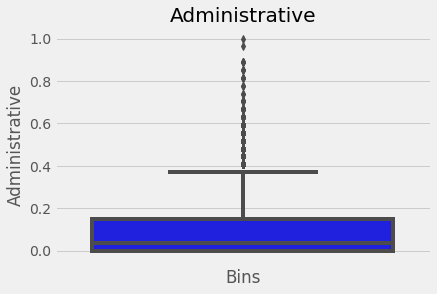

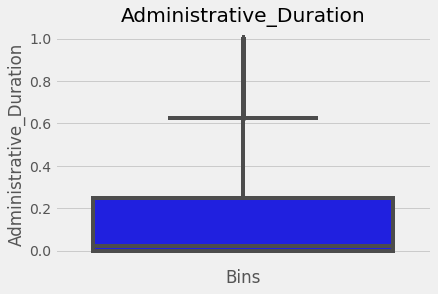

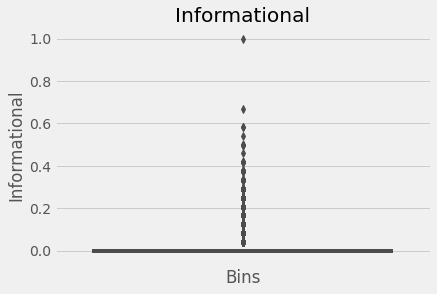

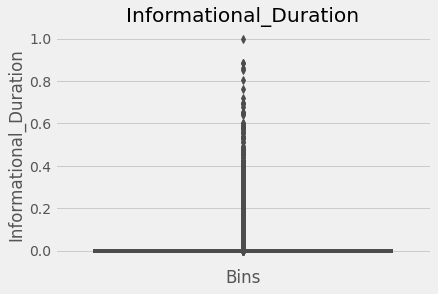

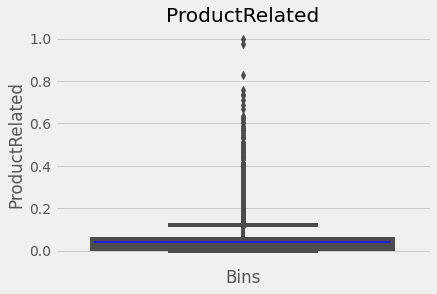

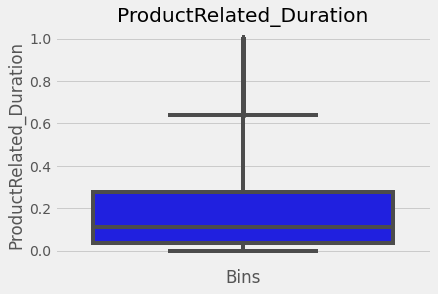

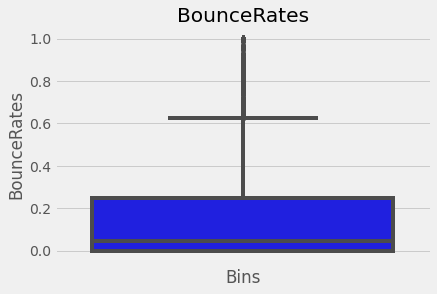

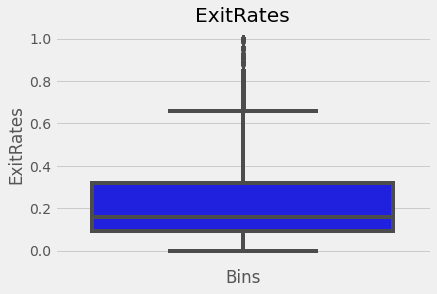

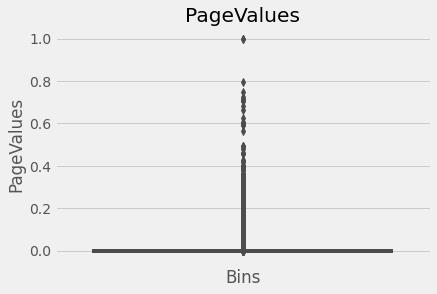

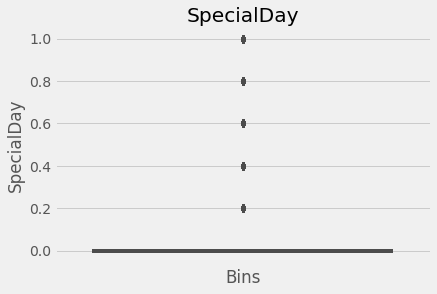

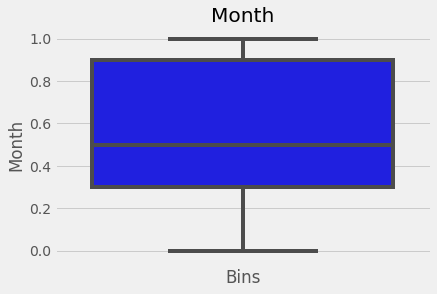

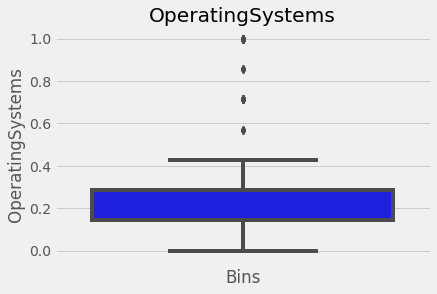

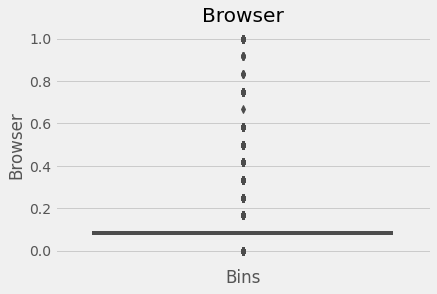

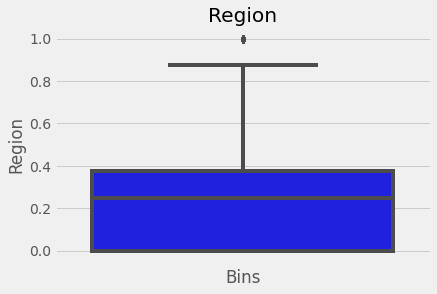

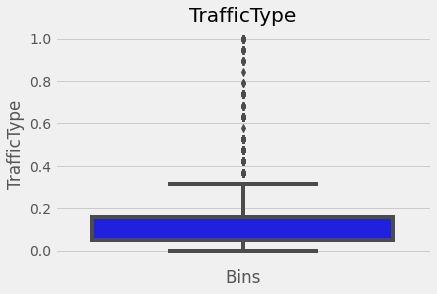

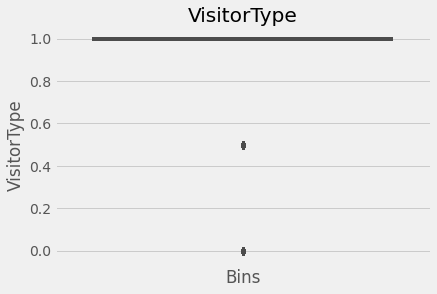

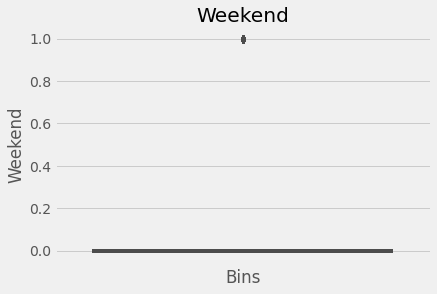

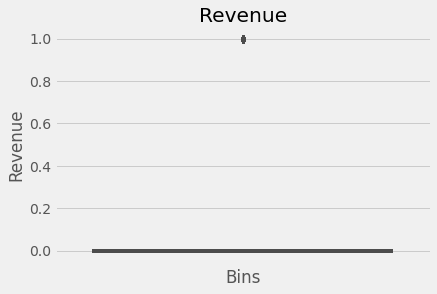

In [ ]:
# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()


*** Histogram Plot ***
Histograms


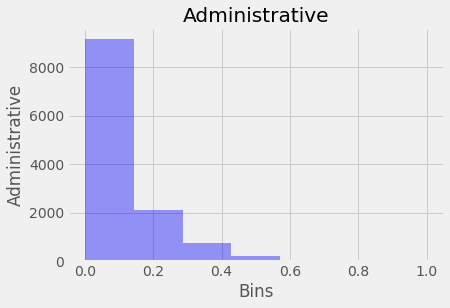

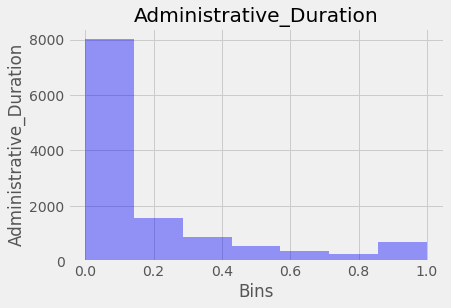

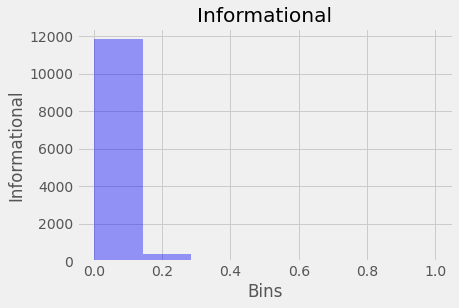

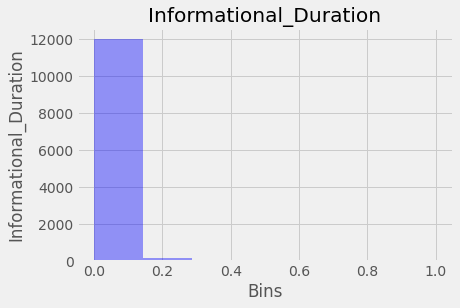

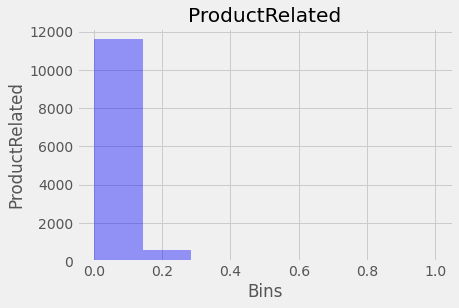

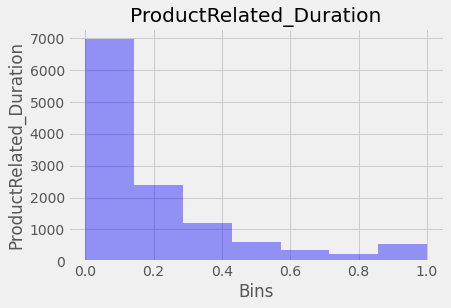

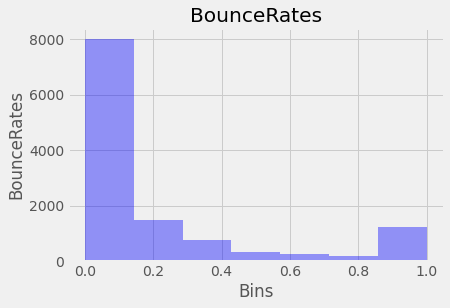

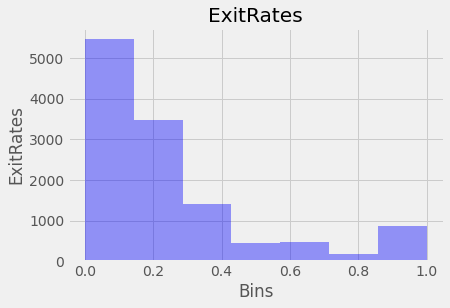

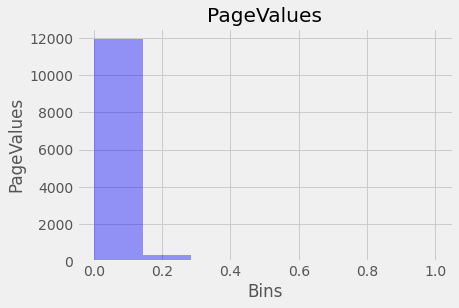

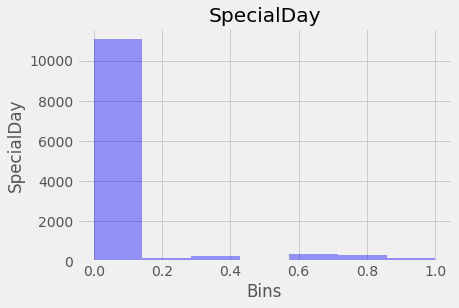

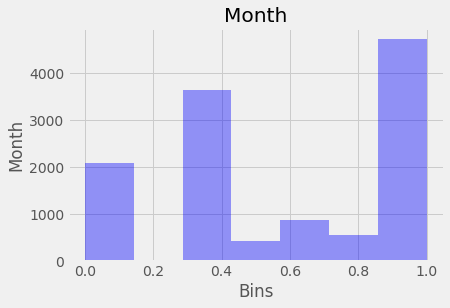

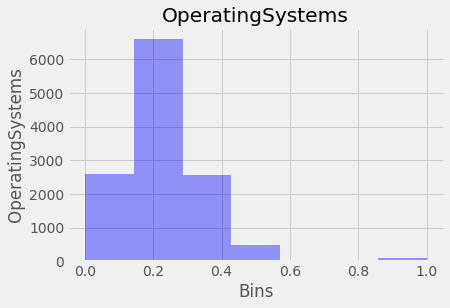

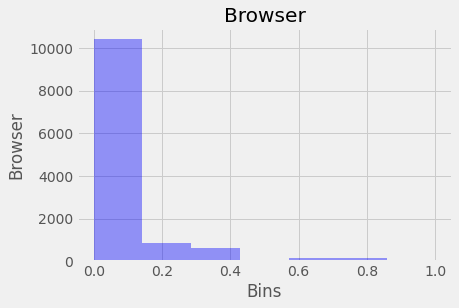

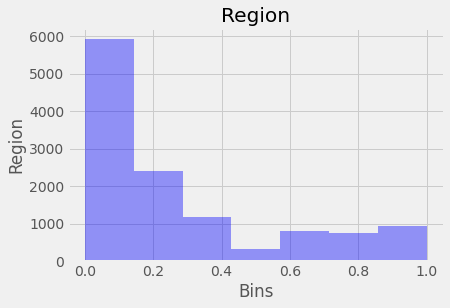

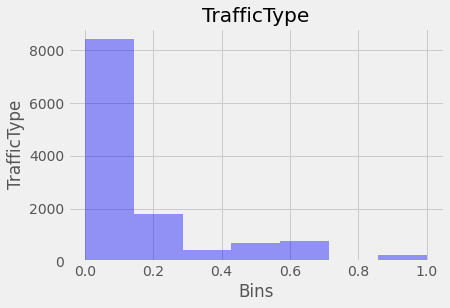

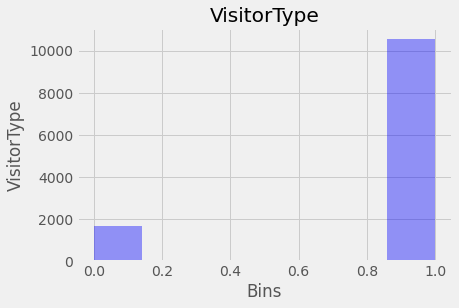

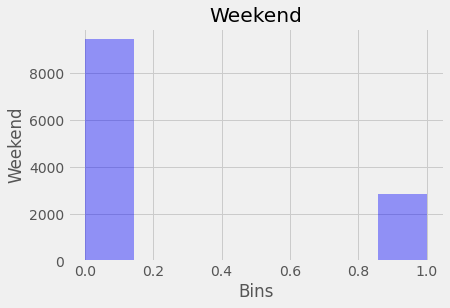

In [ ]:
# histograms
# plot histograms
print("\n*** Histogram Plot ***")
colNames = df.columns.tolist()
colNames.remove(clsVars)
print('Histograms')
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

In [ ]:
# check class
# outcome groupby count    
print("\n*** Group Counts ***")
print(df.groupby(clsVars).size())
print("")


*** Group Counts ***
Revenue
0    10422
1     1908
dtype: int64




*** Distribution Plot ***


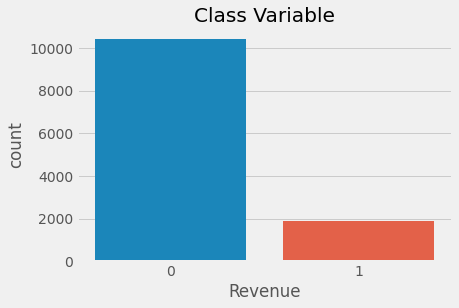

In [ ]:
# class count plot
print("\n*** Distribution Plot ***")
plt.figure()
sns.countplot(df[clsVars],label="Count")
plt.title('Class Variable')
plt.show()

Text(0, 0.5, '')

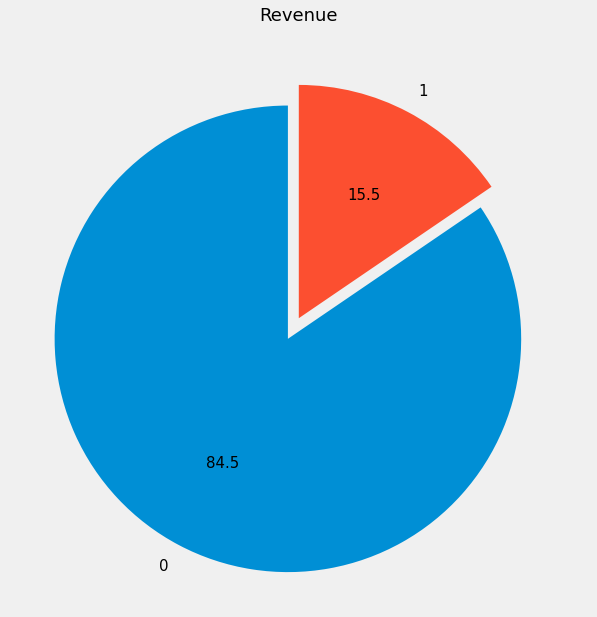

In [ ]:
# Class imbalance
plt.figure(figsize=(10,10))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0))  
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f8b191450>,
      dtype=object)

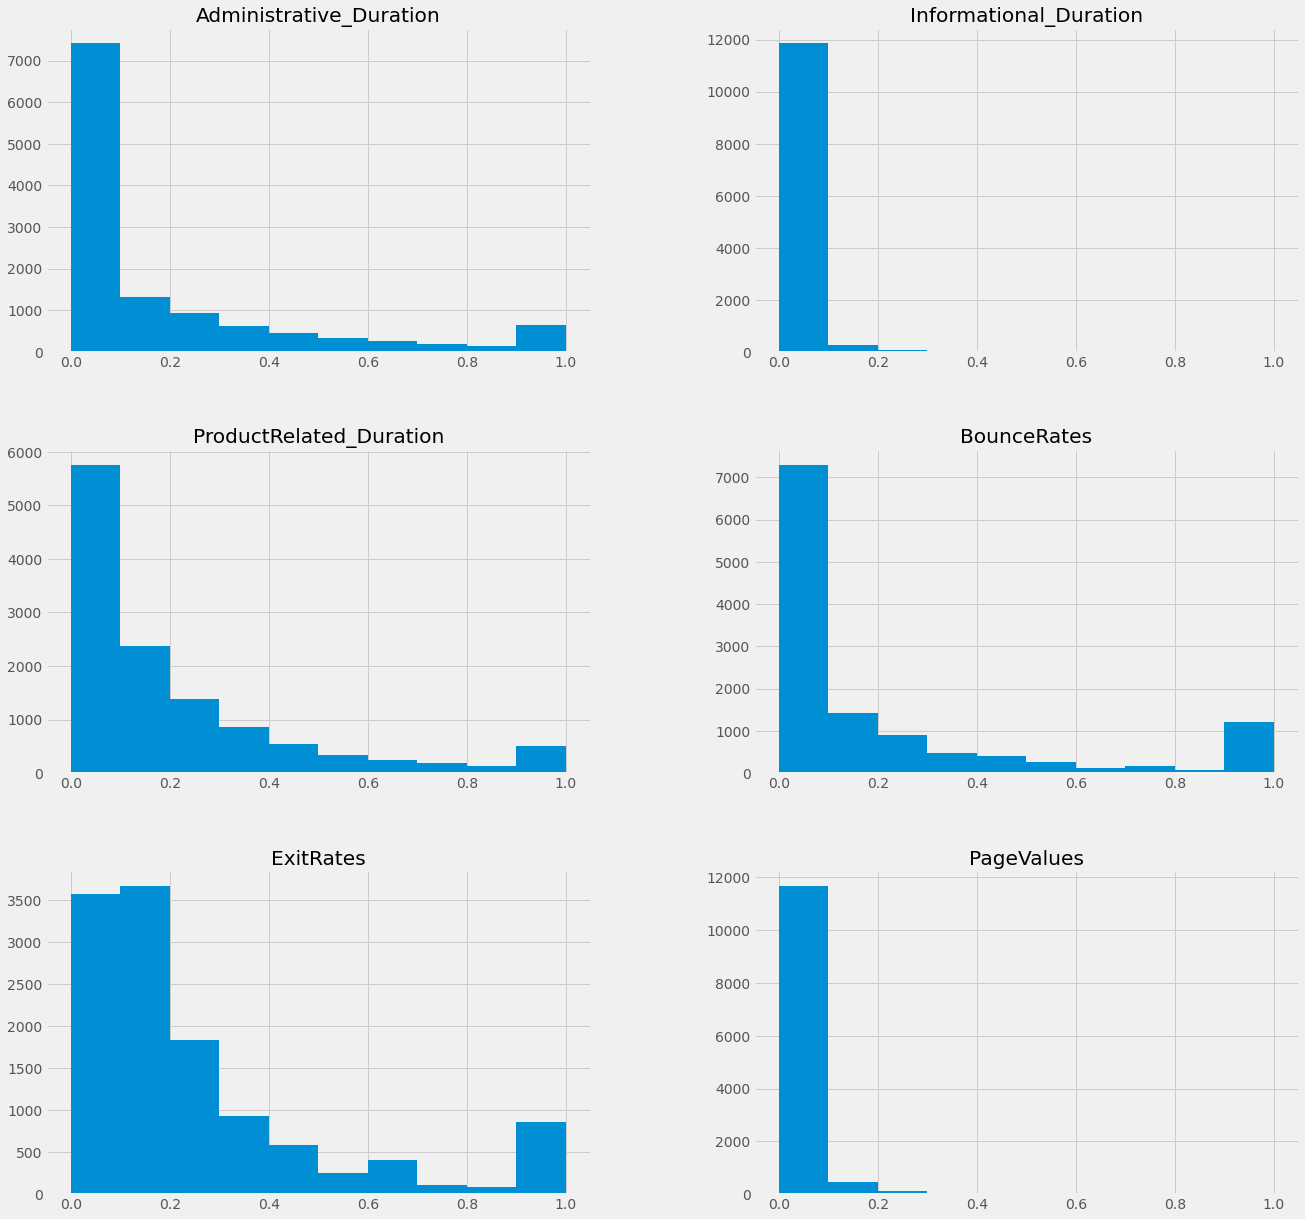

In [ ]:
# Distribution of all numerical columns:
num_col=['Administrative_Duration',
       'Informational_Duration', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']
df.hist(column=num_col,figsize=(20,20))

**Classification:**
**set X & y**
**Split into data & target**

In [ ]:
################################
# Classification 
# set X & y
###############################

# split into data & target
print("\n*** Prepare Data ***")
allCols = df.columns.tolist()
print(allCols)
allCols.remove(clsVars)
print(allCols)
X = df[allCols].values
y = df[clsVars].values


*** Prepare Data ***
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [ ]:
# shape
print("\n*** Prepare Data - Shape ***")
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Prepare Data - Shape ***
(12330, 17)
(12330,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# head
print("\n*** Prepare Data - Head ***")
print(X[0:4])
print(y[0:4])


*** Prepare Data - Head ***
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41843972e-03 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.83687943e-03 1.20658728e-02 0.00000000e+00 6.36363633e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.42857143e-01
  8.33333333e-02 0.00000000e+00 5.26315789e-02 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.41843972e-03 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.28571429e-01
  0.00000000e+00 1.00000000e+00 1.05263158e-01 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.83687943e-03 5.02744701e-04 7.43491837e-01 8.90909086e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.

In [ ]:
# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())


*** Counts ***
Revenue
0    10422
1     1908
dtype: int64


We can see that Our class labels i.e. Revenue column are somewhat imbalanced, as there are much more cases in the data with a prediction “False” i.e. 10422 and only 1908 data with a prediction “True”. The reason is that more visitors won’t buy anything. Imbalanced data can affect the performance of classification models. But now that we are aware of the imbalance in our data, so will use oversampling method.

**Over  Sampling :**













*   Oversampling Is Just The Opposite Of Under Sampling.

*   Here The Class Containing Less Data Is Made Equivalent To The Class Containing More Data.

*   This Is Done By Adding More Data To The Least Sample Containing Class.


*  Let’s Take The Example, Suppose Class A Has 900 Samples And Class B Has 100 Samples, Then The Imbalance Ratio Is 9:1

*   Then, after oversampling, Class A Will Remain 900 And Class B Will Also Be 900 (Which Was Previously 100).

*   Hence The Ratio Will Be 1:1 And It’ll Be Balanced.





In [ ]:
# over sampling
# print("\n*** Over Sampling Process ***")
X, y = getOverSamplerData(X, y)
print("Done ...")

Done ...


In [ ]:
# counts
print("\n*** Counts ***")
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))


*** Counts ***
[[    0     1]
 [10422 10422]]


So now in our case for Revenue both class i.e. False and True becomes equal i.e. 10422.

Now the Ratio will be 1:1 and it is balanced now.


In [ ]:
# shape
print("\n*** Prepare Data - Shape ***")
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


*** Prepare Data - Shape ***
(20844, 17)
(20844,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Splitting the data into train and test**

In [ ]:
################################
# Classification 
# Split Train & Test
###############################

# imports
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                test_size=0.33, random_state=707)

In [ ]:
# shapes
print("\n*** Train & Test Data ***")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


*** Train & Test Data ***
(13965, 17)
(13965,)
(6879, 17)
(6879,)


In [ ]:
# counts
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("\n*** Frequency of unique values of Train Data ***")
print(np.asarray((unique_elements, counts_elements)))


*** Frequency of unique values of Train Data ***
[[   0    1]
 [6983 6982]]


In [ ]:
# counts
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("\n*** Frequency of unique values of Test Data ***")
print(np.asarray((unique_elements, counts_elements)))


*** Frequency of unique values of Test Data ***
[[   0    1]
 [3439 3440]]


**Creating models using different algorithms.**

- SupportVectorClassifier (SVC)
	
- RandomForestClassifier
	
- KNeighborsClassifier
- LogisticRegression
- DecisionTreeClassifier
- GaussianNB (Gaussian Naïve Bayes)


**Importing all model & metrics**

In [ ]:
################################
# Classification 
# actual model ... create ... fit ... predict
###############################

# original
# import all model & metrics
print("\n*** Importing Models ***")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.naive_bayes import GaussianNB
print("\nDone ...")



*** Importing Models ***

Done ...


**create a list of models so that we can use the models in an iterstive manner**

In [ ]:
# create a list of models so that we can use the models in an iterstive manner
print("\n*** Creating Models ***")
models = []
models.append(('SVM-Clf', SVC(random_state=707)))
models.append(('RndFrst', RandomForestClassifier(random_state=707)))
models.append(('KNN-Clf', KNeighborsClassifier()))
models.append(('LogRegr', LogisticRegression(random_state=707)))
models.append(('DecTree', DecisionTreeClassifier(random_state=707)))
models.append(('GNBayes', GaussianNB()))
print(models)
print("\nDone ...")


*** Creating Models ***
[('SVM-Clf', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=707, shrinking=True, tol=0.001,
    verbose=False)), ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False)), ('KNN-Clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=

**Cross Validation**

In [ ]:
################################
# Classification 
# Cross Validation
###############################

# blank list to store results
print("\n*** Cross Validation Init ***")
xvModNames = []
xvAccuracy = []
xvSDScores = []
print("Done ...")

# cross validation
from sklearn import model_selection
print("\n*** Cross Validation ***")
# iterate through the models
for name, model in models:
    # select xv folds
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=707)
    # actual corss validation
    cvAccuracy = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # prints result of cross val ... scores count = lfold splits
    print(name,":  ",cvAccuracy)
    # update lists for future use
    xvModNames.append(name)
    xvAccuracy.append(cvAccuracy.mean())
    xvSDScores.append(cvAccuracy.std())
    
# cross val summary
print("\n*** Cross Validation Summary ***")
# header
msg = "%7s: %10s %8s" % ("Model", "xvAccuracy", "xvStdDev")
print(msg)
# for each model
for i in range(0,len(xvModNames)):
    # print accuracy mean & std
    msg = "%8s: %5.7f %5.7f" % (xvModNames[i], xvAccuracy[i], xvSDScores[i])
    print(msg)


*** Cross Validation Init ***
Done ...

*** Cross Validation ***
SVM-Clf :   [0.79885469 0.80816034 0.81961346 0.82605583 0.81675018 0.83166189
 0.81948424 0.81733524 0.81733524 0.82020057]
RndFrst :   [0.95060845 0.95705082 0.94702935 0.956335   0.95848246 0.95558739
 0.9491404  0.95558739 0.9512894  0.95057307]
KNN-Clf :   [0.78167502 0.78310666 0.79957051 0.80243379 0.78668576 0.79799427
 0.78151862 0.78868195 0.7965616  0.77077364]
LogRegr :   [0.78811739 0.80458125 0.80386543 0.80816034 0.80171797 0.81232092
 0.80229226 0.81160458 0.79226361 0.80515759]
DecTree :   [0.92627058 0.94273443 0.93772369 0.94846099 0.94846099 0.93982808
 0.93553009 0.93767908 0.93696275 0.92836676]
GNBayes :   [0.73299928 0.73085183 0.74516822 0.73872584 0.73872584 0.75859599
 0.72492837 0.75071633 0.76002865 0.74570201]

*** Cross Validation Summary ***
  Model: xvAccuracy xvStdDev
 SVM-Clf: 0.8175452 0.0085143
 RndFrst: 0.9531684 0.0036848
 KNN-Clf: 0.7889002 0.0095509
 LogRegr: 0.8030081 0.0073100
 

**Find model with best xv accuracy & print details**

In [ ]:
# find model with best xv accuracy & print details
print("\n*** Best XV Accuracy Model ***")
maxXVIndx = xvAccuracy.index(max(xvAccuracy))
print("Index     ",maxXVIndx)
print("Model Name",xvModNames[maxXVIndx])
print("XVAccuracy",xvAccuracy[maxXVIndx])
print("XVStdDev  ",xvSDScores[maxXVIndx])
print("Model     ")
print(models[maxXVIndx])


*** Best XV Accuracy Model ***
Index      1
Model Name RndFrst
XVAccuracy 0.9531683734896514
XVStdDev   0.0036847712516460355
Model     
('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))


**Evaluate : Accuracy & Confusion Metrics**

In [ ]:
# print original confusion matrix
print("\n*** Confusion Matrix ***")
cm = confusion_matrix(y_test, y_test)
print("Original")
print(cm)


*** Confusion Matrix ***
Original
[[3439    0]
 [   0 3440]]


In [ ]:
# blank list to hold info
print("\n*** Confusion Matrix - Init ***")
cmModelInf = []
cmModNames = []
cmAccuracy = []
print("\nDone ... ")


*** Confusion Matrix - Init ***

Done ... 


In [ ]:
# iterate through the modes and calculate accuracy & confusion matrix for each
print("\n*** Confusion Matrix - Compare ***")
for name, model in models:
    # fit the model with train dataset
    model.fit(X_train, y_train)
    # predicting the Test set results
    y_pred = model.predict(X_test)
    # accuracy
    Accuracy = accuracy_score(y_test, y_pred)
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # X-axis Predicted | Y-axis Actual
    print("")
    print(name)
    print(cm)
    print("Accuracy", Accuracy)
    # update lists for future use 
    cmModelInf.append((name, model, cmAccuracy))
    cmModNames.append(name)
    cmAccuracy.append(Accuracy)

# cross val summary
print("\n*** Confusion Matrix Summary ***")
# header
msg = "%7s: %10s " % ("Model", "xvAccuracy")
print(msg)
# for each model
for i in range(0,len(cmModNames)):
    # print accuracy mean & std
    msg = "%8s: %5.7f" % (cmModNames[i], cmAccuracy[i])
    print(msg)


*** Confusion Matrix - Compare ***

SVM-Clf
[[2997  442]
 [ 844 2596]]
Accuracy 0.8130542229975287

RndFrst
[[3164  275]
 [  25 3415]]
Accuracy 0.9563890100305277

KNN-Clf
[[2388 1051]
 [ 352 3088]]
Accuracy 0.7960459369094345

LogRegr
[[2911  528]
 [ 874 2566]]
Accuracy 0.7961913068759994

DecTree
[[3081  358]
 [  38 3402]]
Accuracy 0.9424334932402966

GNBayes
[[2437 1002]
 [ 796 2644]]
Accuracy 0.7386248001162959

*** Confusion Matrix Summary ***
  Model: xvAccuracy 
 SVM-Clf: 0.8130542
 RndFrst: 0.9563890
 KNN-Clf: 0.7960459
 LogRegr: 0.7961913
 DecTree: 0.9424335
 GNBayes: 0.7386248


In [ ]:
print("\n*** Best CM Accuracy Model ***")
maxCMIndx = cmAccuracy.index(max(cmAccuracy))
print("Index     ",maxCMIndx)
print("Model Name",cmModNames[maxCMIndx])
print("CMAccuracy",cmAccuracy[maxCMIndx])
print("Model     ")
print(models[maxCMIndx])


*** Best CM Accuracy Model ***
Index      1
Model Name RndFrst
CMAccuracy 0.9563890100305277
Model     
('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))


**Classification  - Predict Test**

**Evaluate : Accuracy & Confusion Metrics** 

In [ ]:
print("\n*** Accuracy & Models ***")
print("Cross Validation")
print("Accuracy:", xvAccuracy[maxXVIndx])
print("Model   :", models[maxXVIndx]) 
print("Confusion Matrix")
print("Accuracy:", cmAccuracy[maxCMIndx])
print("Model   :", models[maxCMIndx]) 


*** Accuracy & Models ***
Cross Validation
Accuracy: 0.9531683734896514
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))
Confusion Matrix
Accuracy: 0.9563890100305277
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
  

In [ ]:
# classifier object
# select best cm acc ... why
print("\n*** Classfier Object ***")
cf = models[maxCMIndx][1]
print(cf)
# fit the model
cf.fit(X_train,y_train)
print("Done ...")


*** Classfier Object ***
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False)
Done ...


In [ ]:
# classifier object
print("\n*** Predict Test ***")
# predicting the Test set results
p_test = cf.predict(X_test)            # use model ... predict
print("Done ...")


*** Predict Test ***
Done ...


In [ ]:
# accuracy
accuracy = accuracy_score(y_test, p_test)*100
print("\n*** Accuracy ***")
print(accuracy)

# confusion matrix
# X-axis Actual | Y-axis Actual - to see how cm of original is
cm = confusion_matrix(y_test, y_test)
print("\n*** Confusion Matrix - Original ***")
print(cm)

# confusion matrix
# X-axis Predicted | Y-axis Actual
cm = confusion_matrix(y_test, p_test)
print("\n*** Confusion Matrix - Predicted ***")
print(cm)

# classification report
print("\n*** Classification Report ***")
cr = classification_report(y_test, p_test)
print(cr)


*** Accuracy ***
95.63890100305277

*** Confusion Matrix - Original ***
[[3439    0]
 [   0 3440]]

*** Confusion Matrix - Predicted ***
[[3164  275]
 [  25 3415]]

*** Classification Report ***
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3439
           1       0.93      0.99      0.96      3440

    accuracy                           0.96      6879
   macro avg       0.96      0.96      0.96      6879
weighted avg       0.96      0.96      0.96      6879



**Final Prediction**

**Create classfied Object from whole data**

**Read .prd file**

**Predict Species**

**Confusion matrix with data in .prd file**

Creating a .prd file from original data without any transformation

In [ ]:
#online_shoppers_intention_prd = df.sample(n = 20, replace = False)

In [ ]:
# # Saving prd data 
#online_shoppers_intention_prd.to_csv('/content/gdrive/MyDrive/PROJECT - SEM - 2/online_shoppers_intention_prd.csv', index=False)

Read dataset

In [ ]:
# read dataset
print("\n*** Read Data For Prediction ***")
dfp = pd.read_csv(r'/content/gdrive/MyDrive/PROJECT - SEM - 2/online_shoppers_intention_prd.csv')
print(dfp.head())
print(dfp.info())


*** Read Data For Prediction ***
   Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False     True
3               0                      0.0  ...    False    False
4               6                    212.0  ...    False    False

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           20 non-null     int64  
 1   Administrative_Duration  20 non-null     float64
 2   Informational            20 non-null     int64  
 3   Informational_Duration   20 non-null     float64
 4   ProductRelated           20 non-null     int64  
 5   ProductRelated_Duration  20 non-null     float64
 6   BounceR

**Data Transformation / Data Imputation**

In [ ]:
# change as required ... same transformtion as done for main data
# Month
print("\n*** Transformations ***")
dfp['Month'] = dfp['Month'].map({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
print(dfp['Month'].unique())
dfp['Month'] = dfp['Month'].astype(np.int64)
print("Done ...")


*** Transformations ***
[ 5 11  3 10 12]
Done ...


In [ ]:
# convert alpha categoric to numeric categoric
# change as required
print("\n*** Transformations ***")
# VisitorType
from sklearn import preprocessing
leCol4 = preprocessing.LabelEncoder()
print(dfp['VisitorType'].unique())
dfp['VisitorType'] = leCol4.fit_transform(dfp['VisitorType'])
print(dfp['VisitorType'].unique())
dfp['VisitorType'] = dfp['VisitorType'].astype(np.int64)
print("Done ...")


*** Transformations ***
['Returning_Visitor' 'New_Visitor']
[1 0]
Done ...


In [ ]:
print("\n*** Transformations ***")
# Weekend
from sklearn import preprocessing
leCol5 = preprocessing.LabelEncoder()
print(dfp['Weekend'].unique())
dfp['Weekend'] = leCol5.fit_transform(dfp['Weekend'])
print(dfp['Weekend'].unique())
dfp['Weekend'] = dfp['Weekend'].astype(np.int64)
print("Done ...")


*** Transformations ***
[False  True]
[0 1]
Done ...


In [ ]:
# convert string / categoric to numeric
print("\n*** Data For Prediction - Class Vars ***")
# convert string / categoric to numeric
print("\n*** Unique Species - Categoric Alpha to Numeric ***")
from sklearn import preprocessing
le2 = preprocessing.LabelEncoder()
dfp[clsVars] = le2.fit_transform(dfp[clsVars])
lnCCodes = dfp[clsVars].unique()
print(lnCCodes)
print(dfp[clsVars].unique())


*** Data For Prediction - Class Vars ***

*** Unique Species - Categoric Alpha to Numeric ***
[0 1]
[0 1]


In [ ]:
# check variance
print('\n*** Variance In Columns ***')
print(dfp.var())


*** Variance In Columns ***
Administrative                 16.197368
Administrative_Duration     43467.443358
Informational                   0.555263
Informational_Duration      40943.870230
ProductRelated                851.800000
ProductRelated_Duration    989968.096348
BounceRates                     0.005226
ExitRates                       0.004861
PageValues                    320.752703
SpecialDay                      0.067789
Month                          11.607895
OperatingSystems                0.471053
Browser                         0.892105
Region                          5.736842
TrafficType                    27.313158
VisitorType                     0.134211
Weekend                         0.168421
Revenue                         0.134211
dtype: float64


In [ ]:
# check std dev 
print('\n*** StdDev In Columns ***')
print(dfp.std())


*** StdDev In Columns ***
Administrative               4.024595
Administrative_Duration    208.488473
Informational                0.745160
Informational_Duration     202.345917
ProductRelated              29.185613
ProductRelated_Duration    994.971405
BounceRates                  0.072290
ExitRates                    0.069721
PageValues                  17.909570
SpecialDay                   0.260364
Month                        3.407036
OperatingSystems             0.686333
Browser                      0.944513
Region                       2.395171
TrafficType                  5.226199
VisitorType                  0.366348
Weekend                      0.410391
Revenue                      0.366348
dtype: float64


In [ ]:
# check mean
print('\n*** Mean In Columns ***')
print(dfp.mean())


*** Mean In Columns ***
Administrative                2.750000
Administrative_Duration      98.077068
Informational                 0.350000
Informational_Duration       69.037500
ProductRelated               35.300000
ProductRelated_Duration    1180.524829
BounceRates                   0.038791
ExitRates                     0.054508
PageValues                    6.945347
SpecialDay                    0.140000
Month                         7.850000
OperatingSystems              1.950000
Browser                       2.050000
Region                        2.500000
TrafficType                   4.450000
VisitorType                   0.850000
Weekend                       0.200000
Revenue                       0.150000
dtype: float64


In [ ]:
# normalize data
print('\n*** Normalize Data ***')
dfp = NormalizeData(dfp, clsVars)
print('Done ...')


*** Normalize Data ***
Done ...


In [ ]:
# check variance
print('\n*** Variance In Columns ***')
print(dfp.var())


*** Variance In Columns ***
Administrative             0.112482
Administrative_Duration    0.057903
Informational              0.061696
Informational_Duration     0.085750
ProductRelated             0.094382
ProductRelated_Duration    0.075500
BounceRates                0.130645
ExitRates                  0.126436
PageValues                 0.077692
SpecialDay                 0.105921
Month                      0.143307
OperatingSystems           0.052339
Browser                    0.099123
Region                     0.117078
TrafficType                0.075660
VisitorType                0.134211
Weekend                    0.168421
Revenue                    0.134211
dtype: float64


In [ ]:
# check std dev 
print('\n*** StdDev In Columns ***')
print(dfp.std())


*** StdDev In Columns ***
Administrative             0.335383
Administrative_Duration    0.240630
Informational              0.248387
Informational_Duration     0.292831
ProductRelated             0.307217
ProductRelated_Duration    0.274773
BounceRates                0.361449
ExitRates                  0.355579
PageValues                 0.278733
SpecialDay                 0.325455
Month                      0.378560
OperatingSystems           0.228778
Browser                    0.314838
Region                     0.342167
TrafficType                0.275063
VisitorType                0.366348
Weekend                    0.410391
Revenue                    0.366348
dtype: float64


**Split into data & outcome** 

In [ ]:
# split into data & outcome
print("\n*** Data For Prediction - X & y Split ***")
allCols = df.columns.tolist()
allCols.remove(clsVars)
print(allCols)
X_pred = dfp[allCols].values
y_pred = dfp[clsVars].values
print(X_pred)
print(y_pred)


*** Data For Prediction - X & y Split ***
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
[[0.         0.         0.         0.         0.21052632 0.1649606
  0.45238095 0.59928571 0.         0.75       0.22222222 0.66666667
  0.33333333 0.         0.63157895 1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         1.         0.         0.5        0.22222222 0.33333333
  0.33333333 0.         0.63157895 1.         0.        ]
 [0.         0.         0.         0.         0.71578947 1.
  0.00746269 0.0836395  0.         0.         0.88888889 0.33333333
  0.         0.         0.05263158 1.         0.        ]
 [0.         0.         0.         0.         0.42105263 0.17890217
  0.0625     0.116      0.         0.5     

**Creating Models**

In [ ]:
print("\n*** Accuracy & Models ***")
print("Cross Validation")
print("Accuracy:", xvAccuracy[maxXVIndx])
print("Model   :", models[maxXVIndx]) 
print("Confusion Matrix")
print("Accuracy:", cmAccuracy[maxCMIndx])
print("Model   :", models[maxCMIndx]) 


*** Accuracy & Models ***
Cross Validation
Accuracy: 0.9531683734896514
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False))
Confusion Matrix
Accuracy: 0.9563890100305277
Model   : ('RndFrst', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
  

In [ ]:
# classifier object
# select best cm acc ... why
print("\n*** Classfier Object ***")
model = models[maxCMIndx][1]
print(model)
# fit the model
model.fit(X,y)
print("Done ...")


*** Classfier Object ***
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=707,
                       verbose=0, warm_start=False)
Done ...


**Predict from model**

In [ ]:
# predict from model
print("\n*** Actual Prediction ***")
p_pred = model.predict(X_pred)
# actual
print("Actual")
print(y_pred)
# predicted
print("Predicted")
print(p_pred)


*** Actual Prediction ***
Actual
[0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# accuracy
print("\n*** Accuracy ***")
accuracy = accuracy_score(y_pred, p_pred)*100
print(accuracy)

# confusion matrix - actual
cm = confusion_matrix(y_pred, y_pred)
print("\n*** Confusion Matrix - Original ***")
print(cm)

# confusion matrix - predicted
cm = confusion_matrix(y_pred, p_pred)
print("\n*** Confusion Matrix - Predicted ***")
print(cm)

# classification report
print("\n*** Classification Report ***")
cr = classification_report(y_pred, p_pred)
print(cr)


*** Accuracy ***
95.0

*** Confusion Matrix - Original ***
[[17  0]
 [ 0  3]]

*** Confusion Matrix - Predicted ***
[[17  0]
 [ 1  2]]

*** Classification Report ***
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
# update data frame
print("\n*** Update Predict Data ***")
dfp['Predict'] = p_pred
#dfp[clsVars] = le.inverse_transform(dfp[clsVars])
#dfp['Predict'] = le.inverse_transform(dfp['Predict'])
print("Done ...")


*** Update Predict Data ***
Done ...


**Final Predicted Data**

In [ ]:
print(dfp.head(20))

    Administrative  Administrative_Duration  ...  Revenue  Predict
0         0.000000                 0.000000  ...        0        0
1         0.000000                 0.000000  ...        0        0
2         0.000000                 0.000000  ...        1        0
3         0.000000                 0.000000  ...        0        0
4         0.500000                 0.244683  ...        0        0
5         0.500000                 0.129843  ...        1        1
6         0.000000                 0.000000  ...        0        0
7         0.000000                 0.000000  ...        1        1
8         0.833333                 0.103852  ...        0        0
9         0.000000                 0.000000  ...        0        0
10        0.750000                 1.000000  ...        0        0
11        0.000000                 0.000000  ...        0        0
12        1.000000                 0.313125  ...        0        0
13        0.583333                 0.410882  ...        0     

**Conclusion:**

•	After building various models and comparing the results I came to a conclusion that the RandomForesstClassifier model yields the best results as it give the accuracy of 95.64% on test data and 95% accuracy on final i.e. on prd data. 

•	RandomForestClassifier has the Highest Accuracy Score(~95) with highest values for Recall, Precision and F1 Score. It predicts the True Revenue most accurately compare to other models.

•	From my analysis, customers who are interested on buying the products :
Tend to stay longer on the website especially when they are on the website which is productrelated.

•	Less likely to bounce or exit

•	Have strong Correlation with the PageValues

•	Therefore, in order to increase the customers who generates the profits, the business should find a way to decrease the BounceRates and ExitRates and improve on the quality of the page.

•	Furthermore, certain months such as May and November had a greater frequency in purchases meaning that e-commerce companies should capitalize in these months and provide additional sales and deals to encourage product sales.

•	To further improve this project, I believe data that could better shape the context of the site visitor would be important. Possible data points that could be used are user buying history, third party data, wish lists, etc. It would allow us to better analyze what characteristics and features are important to look at in possible customers. Finally, it could be useful to add class weights which would add a greater penalty to mis-classifying the under-represented class in order to reduce false positives or false negatives. This would reduce bias on the imbalanced data without “over-training” on the under-represented samples.
